# Random Forest

## Import Packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load in Data

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Wrangling

In [3]:
x = iris.drop('species', axis=1)
y = iris['species']

## Train Test Split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [5]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [6]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## The model predicted 100% of setosa & versicolor species, while 87% of virginica species. An overall accuracy of 96% is not too shabby.

## Hyperparameter Tuning

## Additional Package

In [7]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9111111111111111
4 : 0.9555555555555556
5 : 0.9333333333333333
8 : 0.9555555555555556
10 : 0.9777777777777777
20 : 0.9555555555555556
50 : 0.9555555555555556
75 : 0.9555555555555556
100 : 0.9555555555555556
250 : 0.9555555555555556
500 : 0.9555555555555556


## Looks like 10 is most accurate at 97.8%.

## Want to see this as a graph?

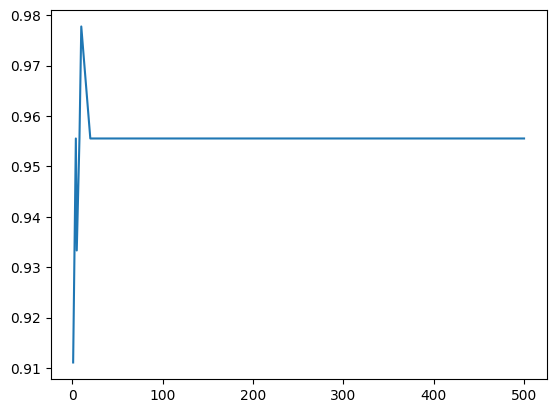

In [12]:
plt.plot(n_estimators_array, results)

## Anything over 100 is definitely a waste of processing power here.

## Tuning the Remaining Three

### Number of features to consider at every split

In [55]:
max_features = ['sqrt', None, 'log2']

### Maximum number of levels in tree

In [56]:
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]

### Minimum number of samples required at each leaf node

In [57]:
min_samples_leaf = [1, 2, 4]

### Method of selecting samples for training each tree

In [58]:
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [59]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [60]:
rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['sqrt', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

## Ask what parameters are best?

In [61]:
rf_random.best_params_

{'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}

## Model with best accuracy has at least 4 samples per leaf, max_features as log2, and max_depth of 10 decision points.

### From here, my answers vary slightly from the text example. I will proceed with my findings as there seems to be a newer issue with the code where 'auto' is an invalid input for max_features.

In [64]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features="log2", max_depth=10)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=4,
                       n_estimators=10)

## Model details

In [65]:
RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)

RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=10)

## Prediction & classification reports

In [66]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



## Great job!  100% accuracy on setosa & versicolor. 93% accuracy on virginica. Overall: 98%!

## Feature Importances

In [67]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.067238
sepal_width     0.032884
petal_length    0.411423
petal_width     0.488454
dtype: float64

## Output in descending order:

In [68]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_width     0.488454
petal_length    0.411423
sepal_length    0.067238
sepal_width     0.032884
dtype: float64


## Graph:

<Axes: >

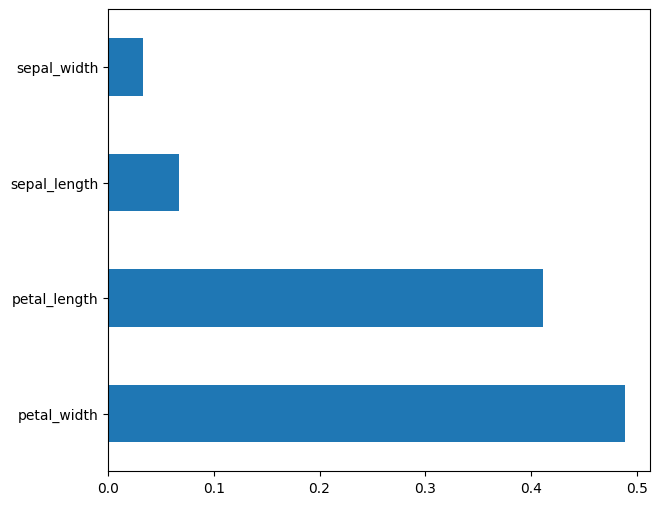

In [69]:
feature_importances.plot(kind='barh', figsize=(7,6))